## Seção 10: Outros Aspectos

In [7]:
import os
import pyspark
import findspark
from pyspark.sql import SparkSession

os.environ["SPARK_HOME"] = "C:\\ApacheSpark\\spark-3.5.3-bin-hadoop3"

findspark.init()
spark = SparkSession.builder.master('local[*]').getOrCreate()

### 73. Usando Spark com notebooks Jupyter

### 74. Convertendo Pandas para DataFrame do Spark

In [1]:
!pip install pandas

In [2]:
import pandas as pd

churn = pd.read_csv(r"C:\Users\viser\OneDrive\Documentos\Cursos\UDEMY_Formação Spark com pySpark\Material\files\Churn.csv", sep=';')
churn.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,10134888,1
1,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,699,France,Female,39,1,0,2,0,0,9382663,0
4,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [3]:
# verificando o tipo, no caso deveria ser um dataframe do pandas
type(churn)

pandas.core.frame.DataFrame

In [ ]:
churn_df = spark.createDataFrame(churn)
type(churn_df)

pyspark.sql.dataframe.DataFrame

In [ ]:
pandas = churn_df.toPandas()
pandas.head(5)

### 75. Usando biblioteca Kolas

In [5]:
!pip install koalas

   ---------------------------------------- 0.0/593.2 kB ? eta -:--:--
   --------------------------------------- 593.2/593.2 kB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 11.8 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 11.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   --- ------------------------------------ 2.4/25.1 MB 11.9 MB/s eta 0:00:02
   ------- -------------------------------- 4.7/25.1 MB 11.9 MB/s eta 0:00:02
   ----------- ---------------------------- 7.3/25.1 MB 11.8 MB/s eta 0:00:02
   --------------- ------------------------ 9.7/25.1 MB 11.8 MB/s eta 0:00:02
   ------------------- -------------------- 12.1/25.1 MB 11.8 MB/s eta 0:00:02
   --------

In [ ]:
import databricks.koalas as kl

churn = kl.read_csv(r"C:\Users\viser\OneDrive\Documentos\Cursos\UDEMY_Formação Spark com pySpark\Material\files\Churn.csv", sep=';')
churn.head(5)

In [ ]:
# Passamos a linha 1 a até 4 e colunas 0 até 4
churn.iloc[1:4,0:4]

,CreditScore,Geography,Gender,Age
1,608,Spain,Female,41
2,502,France,Female,42
3,699,France,Female,39


In [ ]:
# Dados estatisticos da coluna CreditScore
churn['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [11]:
agrupado = churn.groupby(['Geography']).size()

print(agrupado)

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64


### 76. Spark UI

Abrir no navegador após iniciar a sessão spark: localhost:4040

In [8]:
from pyspark.sql.types import *
from pyspark import StorageLevel

In [15]:
despachantes = spark.read.csv(r"C:\Users\viser\OneDrive\Documentos\Cursos\UDEMY_Formação Spark com pySpark\Material\files\despachantes.csv", inferSchema=True, header=False)
despachantes.show(5)

+---+-------------------+-----+-------------+---+----------+
|_c0|                _c1|  _c2|          _c3|_c4|       _c5|
+---+-------------------+-----+-------------+---+----------+
|  1|   Carminda Pestana|Ativo|  Santa Maria| 23|2020-08-11|
|  2|    Deolinda Vilela|Ativo|Novo Hamburgo| 34|2020-03-05|
|  3|   Emídio Dornelles|Ativo| Porto Alegre| 34|2020-02-05|
|  4|Felisbela Dornelles|Ativo| Porto Alegre| 36|2020-02-05|
|  5|     Graça Ornellas|Ativo| Porto Alegre| 12|2020-02-05|
+---+-------------------+-----+-------------+---+----------+
only showing top 5 rows



In [16]:
despachantes.cache()
despachantes.persist(StorageLevel.MEMORY_AND_DISK).count()

10

In [ ]:
despachantes.write.partitionBy("_c3").saveAsTable('desp_UI')

In [ ]:
spark.sql("select * from desp_UI where _c2 = 2").show(5)

### 77. Configurações do Spark

#### **Alterar configurações**
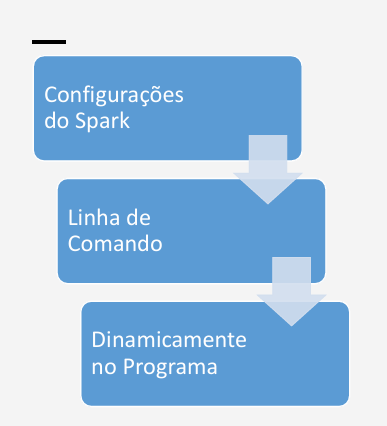

#### **Arquivos de configurações**
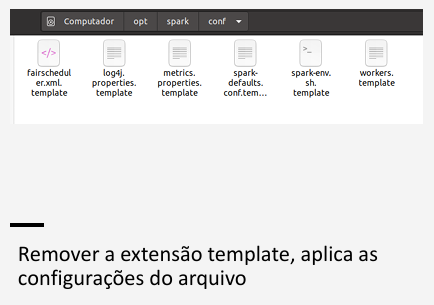

#### **Linhas de comando**
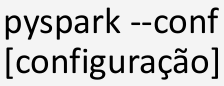

#### **Dinamicamente no Programa**
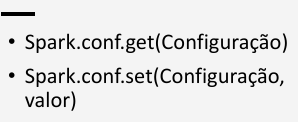
#### **Configurações**

https://spark.apache.org/docs/
